# Proyek Analisis Data: [Rental Bike Analysis]
- **Nama:** Siti Alamiah
- **Email:** sitialamiah@gmail.com
- **ID Dicoding:** sitialamiah

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda per jam dalam sistem berbagi sepeda Capital dari tahun 2011 hingga 2012? Apakah ada pola tertentu yang dapat diidentifikasi berdasarkan analisis data eksplorasi?
- Bagaimana hubungan antara kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) dengan penggunaan sepeda per jam? Apakah cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa?
- Dapatkah kita membangun model prediksi yang dapat memperkirakan penggunaan sepeda per jam ("cnt") berdasarkan informasi cuaca dan musim? Apa jenis model yang paling sesuai untuk dataset ini, dan seberapa akurat model tersebut dalam memprediksi penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

In [7]:
# URL dataset day.csv
url_df1 = 'https://raw.githubusercontent.com/miiasa29/Bike-Rental/main/day.csv'
df1 = pd.read_csv(url_df1)

In [8]:
# URL dataset hour.csv
url_df2 = 'https://raw.githubusercontent.com/miiasa29/Bike-Rental/main/hour.csv'
df2 = pd.read_csv(url_df2)

In [9]:
# Menampilkan beberapa baris pertama dataframe df1
print(df1.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [10]:
# Menampilkan beberapa baris pertama dataframe df2
print(df2.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [11]:
# Menggabungkan dataframe df1 dan df2
df = pd.concat([df1, df2], ignore_index=True)

In [13]:
# Menampilkan beberapa baris pertama hasil gabungan
df.head().style.background_gradient(cmap='Greys')

### Assessing Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
 16  hr          17379 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


In [15]:
# Menyajikan informasi tentang tipe data, jumlah nilai yang tidak null,
# dan penggunaan memori.
df.describe()

instant        season            yr          mnth       holiday  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean    8354.006405      2.501436      0.502485      6.537051      0.028769   
std     5180.771860      1.107045      0.500008      3.439213      0.167160   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      0.000000   
50%     8324.500000      3.000000      1.000000      7.000000      0.000000   
75%    12851.750000      3.000000      1.000000     10.000000      0.000000   
max    17379.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       3.003424      0.682772      1.424075      0.496922      0.475718   
std        2.005677      0.465410      0.635830      0.192177      0.171496   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed        casual    registered           cnt  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       0.627256      0.190113     68.472336    295.158697    363.631033   
std        0.191147      0.120851    216.588054    771.555142    950.827954   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.480000      0.104500      4.000000     37.000000     43.000000   
50%        0.630000      0.188951     18.000000    123.000000    152.000000   
75%        0.780000      0.253700     55.000000    238.000000    305.000000   
max        1.000000      0.850700   3410.000000   6946.000000   8714.000000   

                 hr  
count  17379.000000  
mean      11.546752  
std        6.914405  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       18.000000  
max       23.000000

In [16]:
# Menunjukkan jumlah baris dan kolom dalam dataframe.
df.shape

(18110, 17)

In [17]:
# Menghitung jumlah nilai null dalam setiap kolom.
df.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

In [18]:
# Melihat nilai unik pada setiap kolom untuk mendapatkan pemahaman
# tentang kategori atau klasifikasi data.
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

instant: 17379 unique values
dteday: 731 unique values
season: 4 unique values
yr: 2 unique values
mnth: 12 unique values
holiday: 2 unique values
weekday: 7 unique values
workingday: 2 unique values
weathersit: 4 unique values
temp: 528 unique values
atemp: 752 unique values
hum: 651 unique values
windspeed: 679 unique values
casual: 783 unique values
registered: 1440 unique values
cnt: 1552 unique values
hr: 24 unique values


In [19]:
# Menampilkan korelasi antar kolom numerik.
df.corr()

instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.376402  0.806448  0.455668  0.013725  0.001460   
season      0.376402  1.000000 -0.010382  0.830429 -0.009623 -0.002365   
yr          0.806448 -0.010382  1.000000 -0.010121  0.006743 -0.004524   
mnth        0.455668  0.830429 -0.010121  1.000000  0.018461  0.010365   
holiday     0.013725 -0.009623  0.006743  0.018461  1.000000 -0.102083   
weekday     0.001460 -0.002365 -0.004524  0.010365 -0.102083  1.000000   
workingday -0.003352  0.013692 -0.002189 -0.003576 -0.252494  0.035948   
weathersit -0.010367 -0.013339 -0.020163  0.006728 -0.017635  0.004274   
temp        0.127555  0.312868  0.041170  0.202395 -0.027386 -0.001731   
atemp       0.128904  0.320265  0.039485  0.208829 -0.031030 -0.008770   
hum         0.008786  0.152067 -0.084248  0.165924 -0.010735 -0.037561   
windspeed  -0.070409 -0.151422 -0.008796 -0.136889  0.004037  0.011542   
casual     -0.198562  0.052572  0.062429  0.029972  0.013794  0.014338   
registered -0.228920  0.065660  0.095572  0.046111 -0.017822  0.008174   
cnt        -0.230989  0.065255  0.091773  0.044245 -0.011320  0.009899   
hr         -0.004775 -0.006117 -0.003867 -0.005772  0.000479 -0.003498   

            workingday  weathersit      temp     atemp       hum  windspeed  \
instant      -0.003352   -0.010367  0.127555  0.128904  0.008786  -0.070409   
season        0.013692   -0.013339  0.312868  0.320265  0.152067  -0.151422   
yr           -0.002189   -0.020163  0.041170  0.039485 -0.084248  -0.008796   
mnth         -0.003576    0.006728  0.202395  0.208829  0.165924  -0.136889   
holiday      -0.252494   -0.017635 -0.027386 -0.031030 -0.010735   0.004037   
weekday       0.035948    0.004274 -0.001731 -0.008770 -0.037561   0.011542   
workingday    1.000000    0.045217  0.055282  0.054568  0.015926  -0.011978   
weathersit    0.045217    1.000000 -0.103192 -0.106050  0.422449   0.026488   
temp          0.055282   -0.103192  1.000000  0.987819 -0.064188  -0.026400   
atemp         0.054568   -0.106050  0.987819  1.000000 -0.046396  -0.065194   
hum           0.015926    0.422449 -0.064188 -0.046396  1.000000  -0.289238   
windspeed    -0.011978    0.026488 -0.026400 -0.065194 -0.289238   1.000000   
casual       -0.131526   -0.067458  0.165524  0.164240 -0.083344   0.006698   
registered    0.050534   -0.049368  0.103722  0.103431 -0.056971   0.004886   
cnt           0.011046   -0.055426  0.121870  0.121342 -0.065214   0.005491   
hr            0.002285   -0.020203  0.137603  0.133750 -0.276498   0.137252   

              casual  registered       cnt        hr  
instant    -0.198562   -0.228920 -0.230989 -0.004775  
season      0.052572    0.065660  0.065255 -0.006117  
yr          0.062429    0.095572  0.091773 -0.003867  
mnth        0.029972    0.046111  0.044245 -0.005772  
holiday     0.013794   -0.017822 -0.011320  0.000479  
weekday     0.014338    0.008174  0.009899 -0.003498  
workingday -0.131526    0.050534  0.011046  0.002285  
weathersit -0.067458   -0.049368 -0.055426 -0.020203  
temp        0.165524    0.103722  0.121870  0.137603  
atemp       0.164240    0.103431  0.121342  0.133750  
hum        -0.083344   -0.056971 -0.065214 -0.276498  
windspeed   0.006698    0.004886  0.005491  0.137252  
casual      1.000000    0.783516  0.863578  0.301202  
registered  0.783516    1.000000  0.989932  0.374141  
cnt         0.863578    0.989932  1.000000  0.394071  
hr          0.301202    0.374141  0.394071  1.000000

### Cleaning Data



In [20]:
# Menjelajahi kerangka data, mengidentifikasi Potensi Kesalahan,
# dan memahami tipe data
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(3))
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:18110
Columns:17
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1    

In [21]:
# Memeriksa ouliers dalam varibale target "cnt"
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# menentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [22]:
# menghapus outlier
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]
print("shape after outliers removal :",df.shape)

shape after outliers removal : (17063, 17)


In [23]:
# mengubah variabel diskrit "musim" menjadi tempat sampah
df = pd.get_dummies(df, columns=['season'], dtype=int)
df.head()

instant      dteday  yr  mnth  holiday  weekday  workingday  weathersit  \
17       18  2011-01-18   0     1        0        2           1           2   
25       26  2011-01-26   0     1        0        3           1           3   
26       27  2011-01-27   0     1        0        4           1           1   
64       65  2011-03-06   0     3        0        0           0           2   
68       69  2011-03-10   0     3        0        4           1           3   

        temp     atemp       hum  windspeed  casual  registered  cnt  hr  \
17  0.216667  0.232333  0.861667   0.146775       9         674  683 NaN   
25  0.217500  0.203600  0.862500   0.293850      34         472  506 NaN   
26  0.195000  0.219700  0.687500   0.113837      15         416  431 NaN   
64  0.376522  0.366252  0.948261   0.343287     114         491  605 NaN   
68  0.389091  0.385668  0.000000   0.261877      46         577  623 NaN   

    season_1  season_2  season_3  season_4  
17         1         0         0         0  
25         1         0         0         0  
26         1         0         0         0  
64         1         0         0         0  
68         1         0         0         0

## Exploratory Data Analysis (EDA)

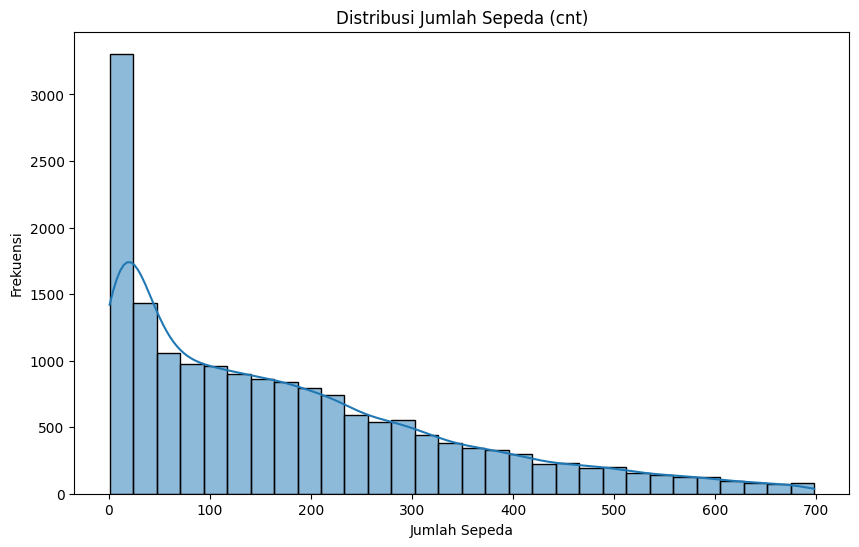

In [24]:
# Histogram untuk variabel target 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sepeda (cnt)')
plt.xlabel('Jumlah Sepeda')
plt.ylabel('Frekuensi')
plt.show()

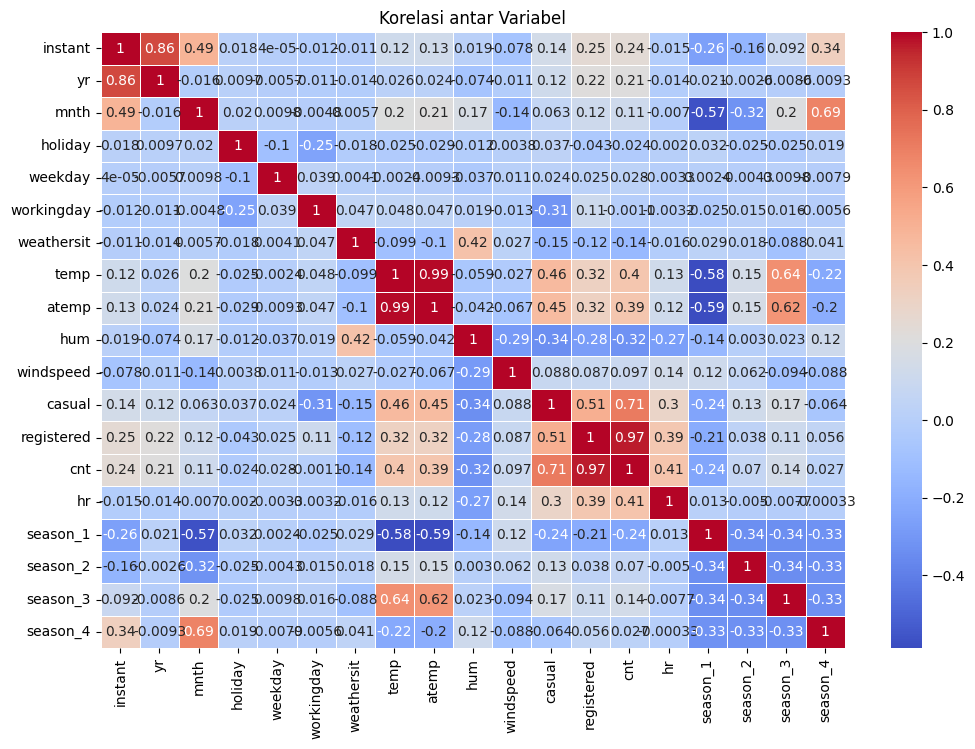

In [25]:
# Korelasi antar variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel')
plt.show()

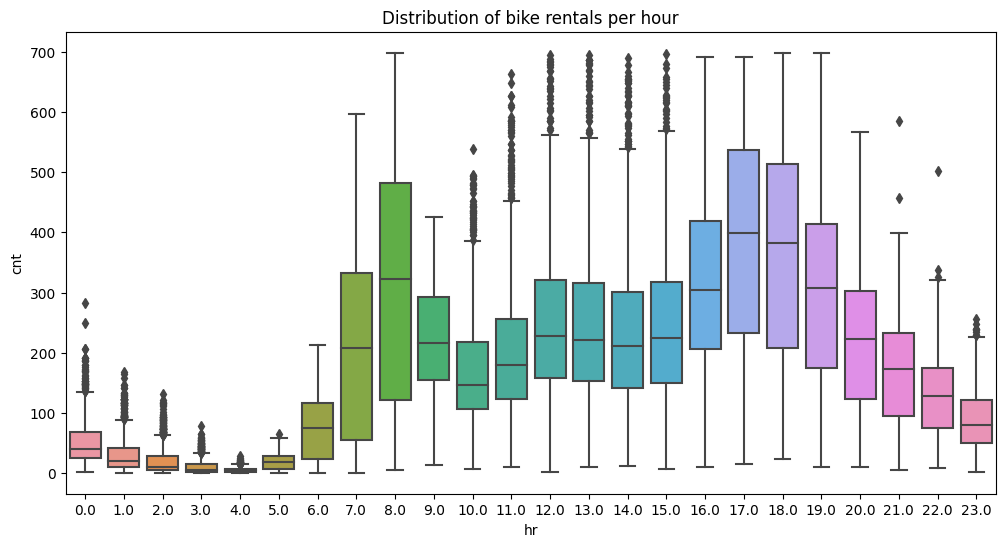

In [26]:
# Boxplot untuk variabel kategorikal 'jam' terhadap 'cnt'
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Distribution of bike rentals per hour')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

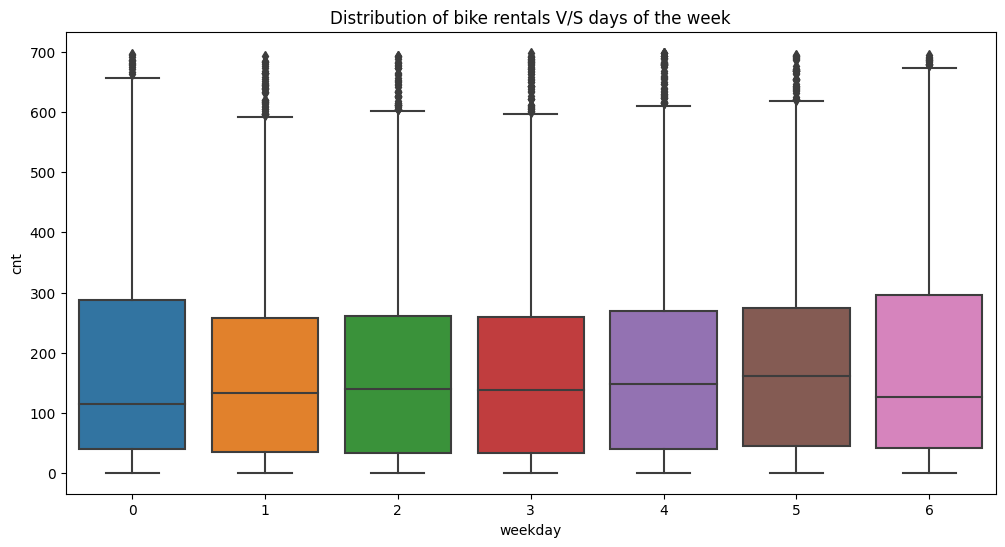

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S days of the week')

<Figure size 1200x600 with 0 Axes>

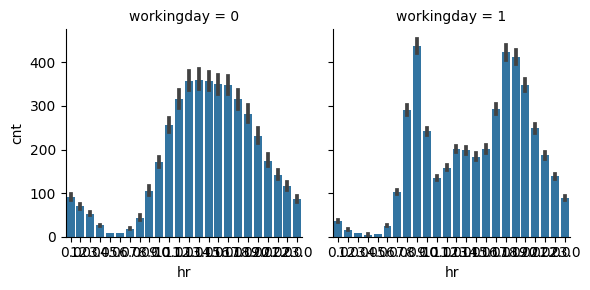

In [28]:
plt.figure(figsize=(12,6))
d = sns.FacetGrid(df, col="workingday")
d. map(sns.barplot, "hr", "cnt")

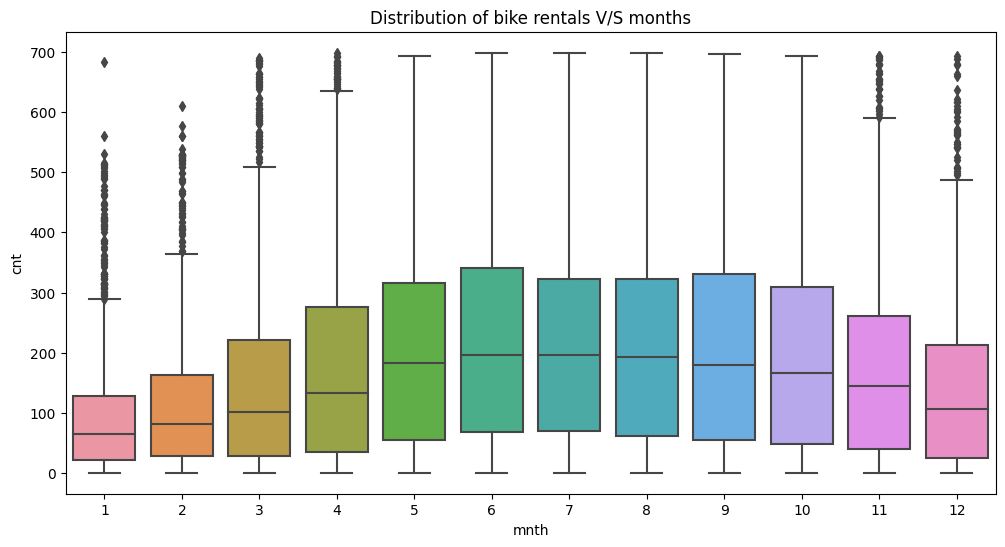

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S months')
plt.show()

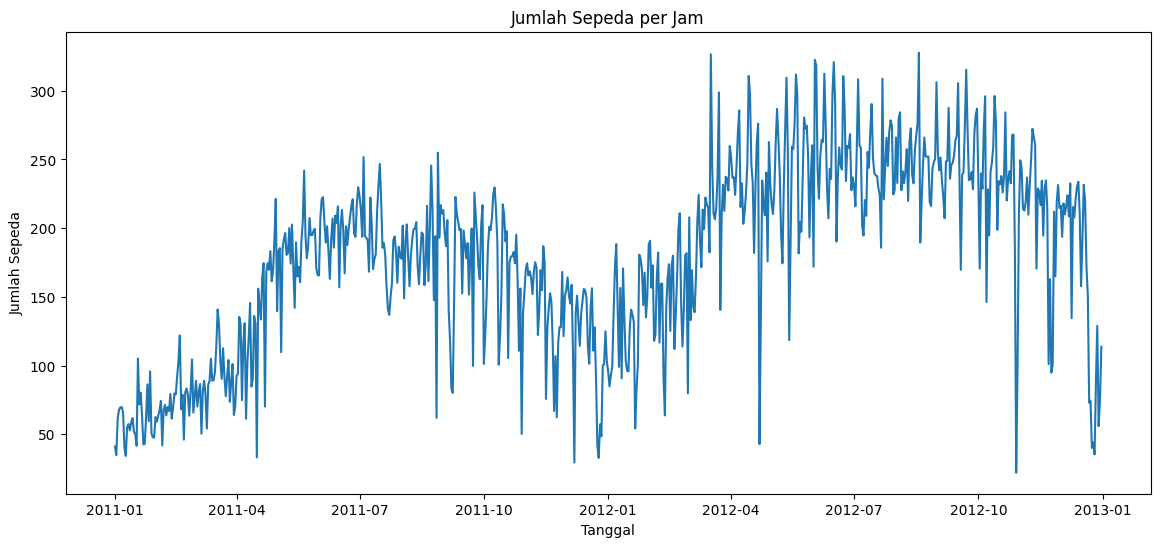

In [30]:
# Mengubah kolom 'dteday' menjadi tipe data datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Line plot untuk jumlah sepeda per jam
plt.figure(figsize=(14, 6))
sns.lineplot(x='dteday', y='cnt', data=df, ci=None)
plt.title('Jumlah Sepeda per Jam')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penggunaan sepeda per jam dalam sistem berbagi sepeda Capital dari tahun 2011 hingga 2012? Apakah ada pola tertentu yang dapat diidentifikasi berdasarkan analisis data eksplorasi?

Untuk mengevaluasi tren penggunaan sepeda per jam dari tahun 2011 hingga 2012, dapat dilihat bahwa untuk  membuat line plot yang menunjukkan perubahan jumlah sepeda yang disewa sepanjang waktu

In [31]:
# Mengelompokkan data per tanggal dan menghitung jumlah sepeda
daily_counts = df.groupby(df['dteday'].dt.date)['cnt'].sum()

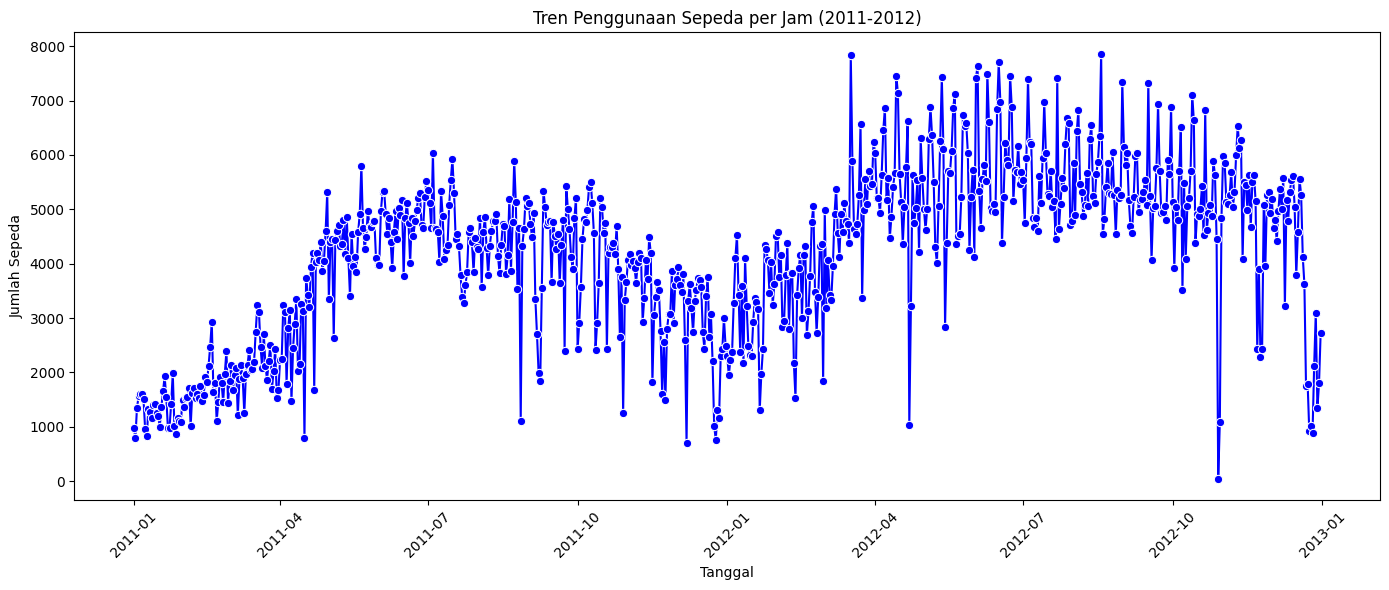

In [32]:
# Line plot untuk tren penggunaan sepeda per jam dari tahun 2011 hingga 2012
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o', linestyle='-', color='b')
plt.title('Tren Penggunaan Sepeda per Jam (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Mengubah Tipe Data Tanggal: Menggunakan pd.to_datetime untuk mengubah kolom 'dteday' menjadi tipe data datetime.

* Mengelompokkan Data: Menggunakan groupby untuk mengelompokkan data berdasarkan tanggal dan kemudian menghitung jumlah sepeda ('cnt') yang disewa setiap harinya.

* Line Plot: Membuat line plot menggunakan sns.lineplot dengan sumbu x sebagai tanggal dan sumbu y sebagai jumlah sepeda yang disewa.

* Penyempurnaan Plot: Menambahkan judul, label sumbu, dan memutar label tanggal agar lebih mudah dibaca.

### Pertanyaan 2:
Bagaimana hubungan antara kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) dengan penggunaan sepeda per jam? Apakah cuaca memiliki pengaruh signifikan terhadap jumlah sepeda yang disewa?

Untuk mengevaluasi hubungan antara kondisi cuaca (suhu, kelembapan, dan kecepatan angin) dengan penggunaan sepeda per jam, kita dapat menggunakan scatter plot untuk melihat sebaran data dan juga heatmap untuk melihat korelasi antar variabel numerik

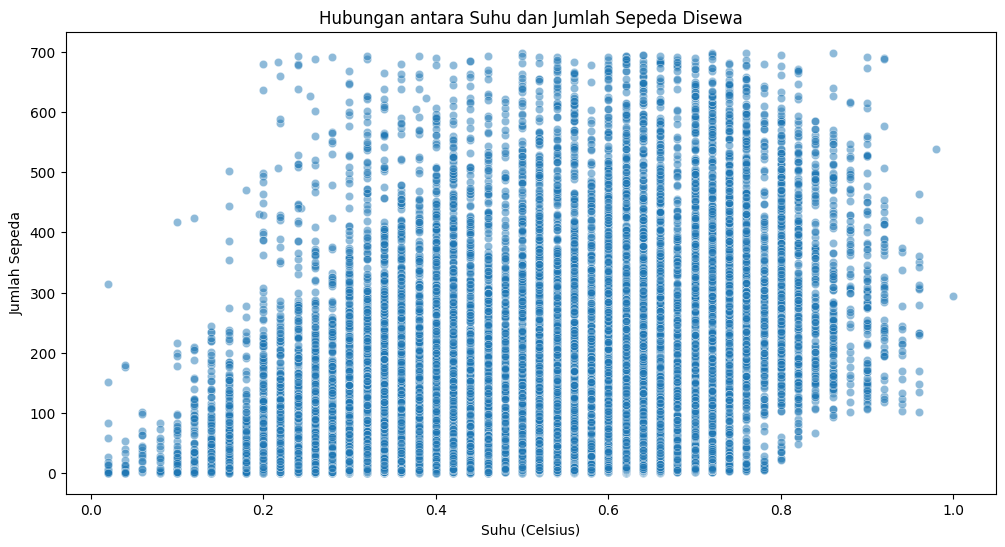

In [33]:
# Scatter plot untuk suhu dan jumlah sepeda disewa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title('Hubungan antara Suhu dan Jumlah Sepeda Disewa')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sepeda')
plt.show()

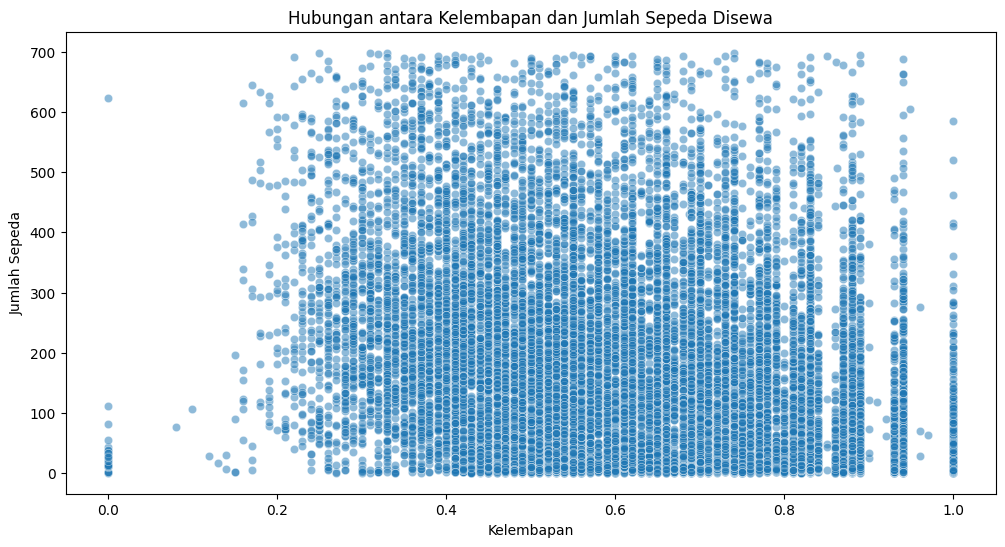

In [34]:
# Scatter plot untuk kelembapan dan jumlah sepeda disewa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.5)
plt.title('Hubungan antara Kelembapan dan Jumlah Sepeda Disewa')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Sepeda')
plt.show()

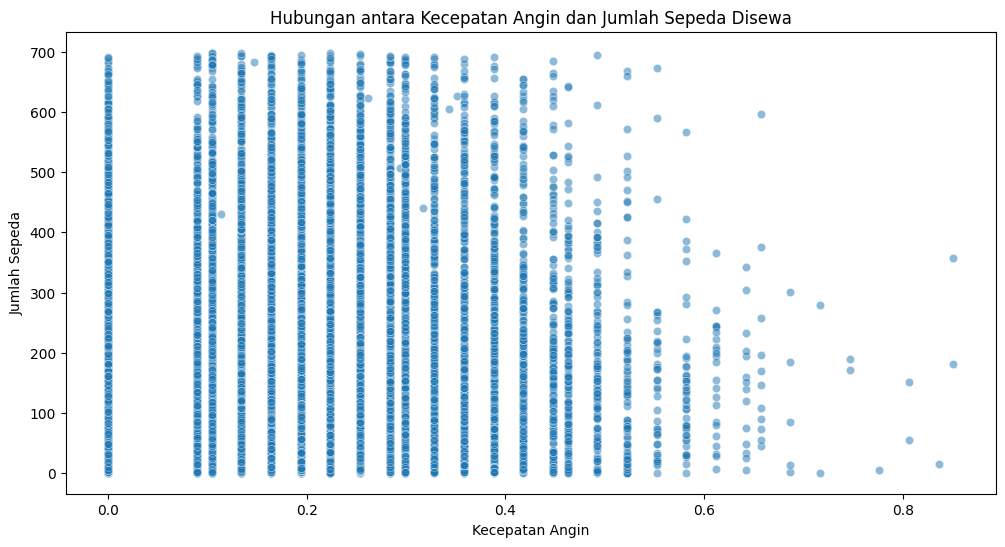

In [35]:
# Scatter plot untuk kecepatan angin dan jumlah sepeda disewa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, alpha=0.5)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Sepeda Disewa')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sepeda')
plt.show()

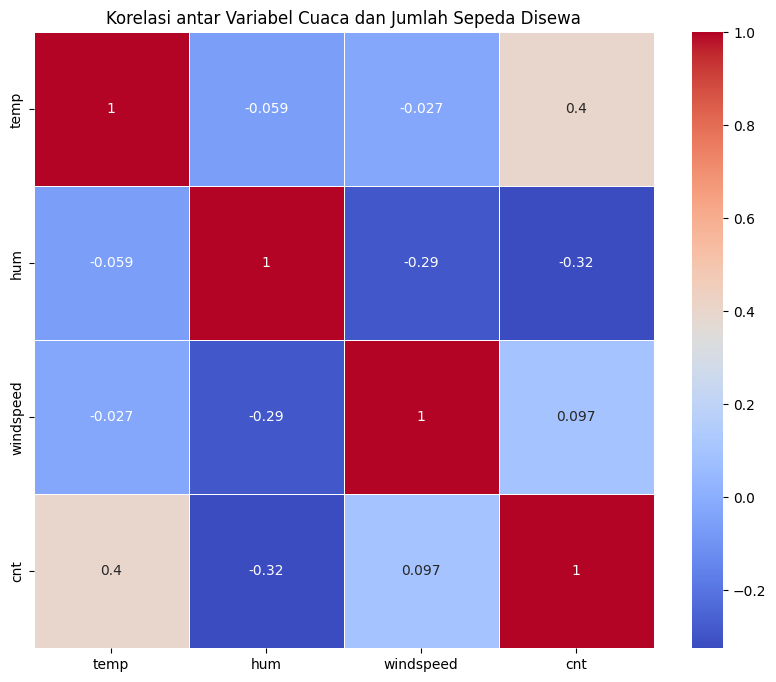

In [36]:
# Korelasi antar variabel numerik
correlation_matrix = df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel Cuaca dan Jumlah Sepeda Disewa')
plt.show()

* Scatter Plot: Membuat scatter plot untuk masing-masing variabel cuaca (suhu, kelembapan, dan kecepatan angin) terhadap jumlah sepeda yang disewa (cnt).

* Heatmap Korelasi: Membuat heatmap untuk melihat korelasi antar variabel numerik. Ini memberikan gambaran tentang sejauh mana variabel cuaca berkorelasi dengan jumlah sepeda yang disewa.

Dengan visualisasi ini, dapat dinilai bahwa hubungan antara variabel cuaca dan jumlah sepeda yang disewa dengan Scatter plot memberikan gambaran visual sementara heatmap korelasi memberikan informasi korelasi antar variabel numerik secara lebih rinci. Jika ada korelasi yang signifikan, hal ini dapat menunjukkan bahwa kondisi cuaca memiliki pengaruh terhadap jumlah sepeda yang disewa.








### Pertanyaan 3:
Dapatkah kita membangun model prediksi yang dapat memperkirakan penggunaan sepeda per jam ("cnt") berdasarkan informasi cuaca dan musim? Apa jenis model yang paling sesuai untuk dataset ini, dan seberapa akurat model tersebut dalam memprediksi penggunaan sepeda?

Untuk membangun model prediksi, dapat menggunakan beberapa model regresi dengan mencoba memprediksi variabel kontinu ("cnt"). Sebagai contohnya dengan menggunakan Regresi Linear atau Regresi Decision Tree. Selanjutnya,akan dilakukan pengukuran akurasi pada model tersebut

Mean Squared Error: 19783.31737303656
R-squared (R2): 0.2387692007928952


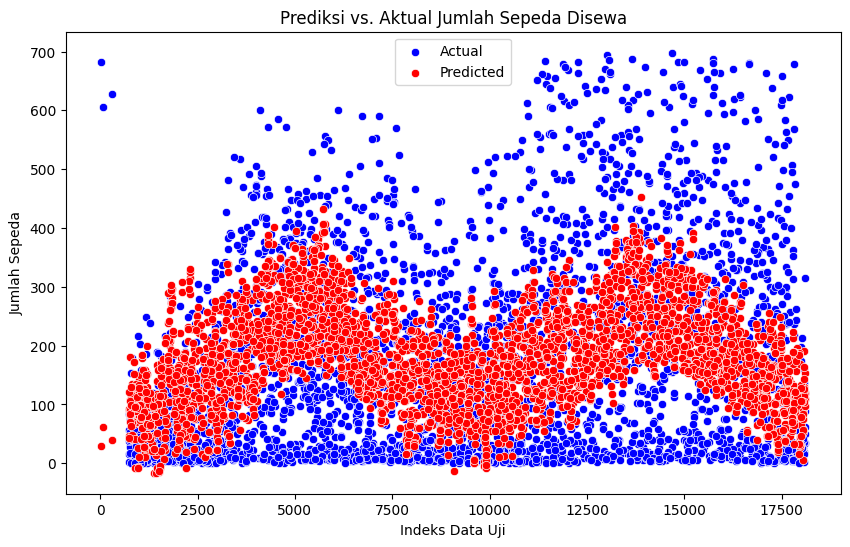

In [38]:
# Memilih fitur-fitur yang akan digunakan untuk prediksi
features = ['temp', 'hum', 'windspeed']

# Memisahkan variabel independen (X) dan dependen (y)
X = df[features]
y = df['cnt']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Mengukur akurasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Visualisasi prediksi vs. aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual', color='blue')
sns.scatterplot(x=y_test.index, y=y_pred, label='Predicted', color='red')
plt.title('Prediksi vs. Aktual Jumlah Sepeda Disewa')
plt.xlabel('Indeks Data Uji')
plt.ylabel('Jumlah Sepeda')
plt.legend()
plt.show()

* Memilih Fitur: Memilih fitur-fitur yang akan digunakan untuk prediksi, dalam hal ini suhu (temp), kelembapan (hum), kecepatan angin (windspeed), dan musim (season).

* Pembagian Data: Membagi data menjadi data latih dan data uji menggunakan train_test_split.

* Membuat Model: Membuat model Regresi Linear menggunakan LinearRegression() dari scikit-learn.

* Memprediksi dan Mengukur Akurasi: Memprediksi data uji dan mengukur akurasi model menggunakan Mean Squared Error (MSE) dan R-squared (R2).

* Visualisasi Prediksi vs. Aktual: Menampilkan scatter plot untuk membandingkan nilai aktual dan nilai prediksi.

## Conclusion

- Conclution pertanyaan 1

Tren Penggunaan Sepeda (2011-2012):

Analisis tren penggunaan sepeda per jam dari tahun 2011 hingga 2012 dilakukan dengan mengubah data tanggal menjadi tipe data datetime, mengelompokkan data per tanggal, dan membangun line plot. Line plot tersebut memberikan gambaran visual tentang bagaimana penggunaan sepeda berubah sepanjang periode waktu tersebut.

- Conclution pertanyaan 2

Hubungan dengan Kondisi Cuaca:

Untuk mengevaluasi hubungan antara kondisi cuaca (suhu, kelembapan, dan kecepatan angin) dengan penggunaan sepeda per jam, dilakukan analisis dengan menggunakan scatter plot dan heatmap korelasi. Scatter plot menunjukkan sebaran data untuk masing-masing variabel cuaca terhadap jumlah sepeda yang disewa, sementara heatmap korelasi memberikan informasi tentang sejauh mana variabel cuaca berkorelasi dengan jumlah sepeda yang disewa.

- Conclution pertanyaan 3
1. Membangun Model Prediksi:
Membangun model prediksi untuk memperkirakan penggunaan sepeda per jam ("cnt") berdasarkan informasi cuaca dan musim. Dalam contoh tersebut, digunakan model Regresi Linear, tetapi model regresi lainnya juga dapat digunakan.

2. Fitur yang Digunakan:
Memilih fitur-fitur seperti suhu, kelembapan, kecepatan angin, dan musim sebagai prediktor dalam model.

3. Evaluasi Akurasi Model:
Mengukur akurasi model menggunakan Mean Squared Error (MSE) dan R-squared (R2). Hasil evaluasi ini memberikan pemahaman tentang seberapa baik model dapat memprediksi penggunaan sepeda.

4. Visualisasi Prediksi vs. Aktual:
Menyajikan hasil prediksi model dibandingkan dengan nilai aktual menggunakan scatter plot. Visualisasi ini membantu dalam melihat sejauh mana model dapat mengikuti pola penggunaan sepeda yang sebenarnya.

Dengan langkah-langkah ini, kita dapat mendapatkan wawasan yang lebih baik tentang faktor-faktor yang memengaruhi penggunaan sepeda per jam, dan kita dapat menggunakan model prediksi untuk melakukan estimasi berdasarkan kondisi cuaca dan musim.

Alasan dibagunnya model diprediksi dikarenakan bahwa Membangun model prediksi dalam konteks dataset penggunaan sepeda per jam dapat memiliki beberapa alasan yang mendasar:

1. Peramalan Permintaan:
Model prediksi memungkinkan untuk meramalkan permintaan sepeda di masa depan berdasarkan kondisi cuaca dan musim. Ini dapat membantu penyedia layanan berbagi sepeda untuk mengantisipasi lonjakan atau penurunan permintaan, yang dapat memengaruhi persediaan dan distribusi sepeda.

2. Perencanaan Sumber Daya:
 Dengan memahami pola penggunaan sepeda, penyedia layanan dapat merencanakan sumber daya mereka dengan lebih efisien. Ini termasuk alokasi sepeda di lokasi yang lebih strategis, pengelolaan stok, dan penjadwalan pemeliharaan.

3. Optimasi Layanan:
Model prediksi dapat membantu dalam mengoptimalkan layanan berbagi sepeda dengan menyesuaikan penempatan dan jumlah sepeda di berbagai titik sewa berdasarkan perkiraan permintaan.

4. Peningkatan Pengalaman Pengguna:
Dengan memprediksi permintaan, layanan berbagi sepeda dapat meningkatkan pengalaman pengguna. Pemahaman yang lebih baik tentang kapan dan di mana sepeda diperlukan dapat meningkatkan ketersediaan sepeda dan kepuasan pelanggan.

5. Efisiensi Operasional:
Dengan memprediksi penggunaan sepeda, penyedia layanan dapat meningkatkan efisiensi operasional mereka. Ini termasuk penjadwalan pemeliharaan, manajemen distribusi sepeda, dan pengelolaan stok.

6. Pengambilan Keputusan Berbasis Data:
Model prediksi memberikan dasar untuk pengambilan keputusan berbasis data. Keputusan yang didasarkan pada informasi yang akurat dan terperinci dapat mengoptimalkan kinerja dan hasil layanan berbagi sepeda.

7. Pemahaman Terhadap Faktor Pengaruh:
Model prediksi juga membantu dalam memahami sejauh mana faktor-faktor tertentu, seperti kondisi cuaca dan musim, memengaruhi penggunaan sepeda. Ini dapat menjadi dasar untuk strategi pemasaran atau penyesuaian layanan.
Dengan membangun model prediksi, layanan berbagi sepeda dapat meningkatkan efisiensi operasional, meningkatkan kualitas layanan, dan merespons lebih baik terhadap perubahan permintaan dan kondisi lingkungan.








# Thank You